# Beamforming - Contre-mesures RADAR
### Maxime BARRET

In [2]:
%matplotlib notebook   #Indique qu'on va afficher des figures, et permet de les modifier

import numpy as np
import matplotlib.pyplot as plt
import random as rd      #Imports d'usage

### Situation initiale

La situation est la suivante : 
- Ma source ne bouge pas pour l'instant
- M antennes dans mon array
- d : distance entre mes antennes dans mon array (doit être cohérente avec la taille d'un UGV/UAV)
- Le problème est plan
- bruit nul 
- Meilleur des mondes


Avec notre array, on mesure : 

$$ \mathbf{y}_l = \sum_{s=1}^{S} x_s \mathbf{a}(\theta_s) + \mathbf{n}_l $$

Ici, S=1 : un seul RADAR éclaire notre cible, du moins pour l'instant

Le diagramme de rayonnement de notre ULA
$DP(\theta) = 20 \log_{10} \left( \dfrac{\mathbf{a}(\theta)^H \mathbf{a}(\theta_0)}{\|\mathbf{a}(\theta)\|^2} \right)$ dB.



In [44]:
d= 0.5          #Distance entre mes émetteurs
M = 5              #Nombre d'émetteurs sur ma cible
N = 721
angle = np.linspace(-np.pi/2,np.pi/2,2*N+1)     #Grille sur laquel on va chercher l'angle d'incidence

theta0 = -np.pi/4    #Angle auquel se situe le radar qu'on doit tromper
lam = 1


In [45]:
def a(theta,lam,M):
    """
    Fonction renvoyant le steering vector
    :param theta: angle thêta
    :param lam: paramètre de Nyquist
    :param M: nombre de capteurs (Donc ici nombre d'émetteurs)
    :return: array
    """
    res = np.zeros(M, dtype=complex)
    for i in range(0, M):
        res[i] = np.exp(-1j * (2 * np.pi * d * i * np.sin(theta) / lam))
    return res

In [46]:
def DP(theta):
    """
    Schéma directionnel  (directivity pattern)
    :param theta:
    :return:
    """
    A = a(theta,lam,M)
    temp = np.dot(np.conj(A).T, a(theta0,lam,M))
    dp = 20*np.log10(temp/(np.linalg.norm(a(theta,lam,M))**2))
    return dp



## Affichage des Directivity pattern de notre ULA avec des sources situées à des angles différents

<IPython.core.display.Javascript object>


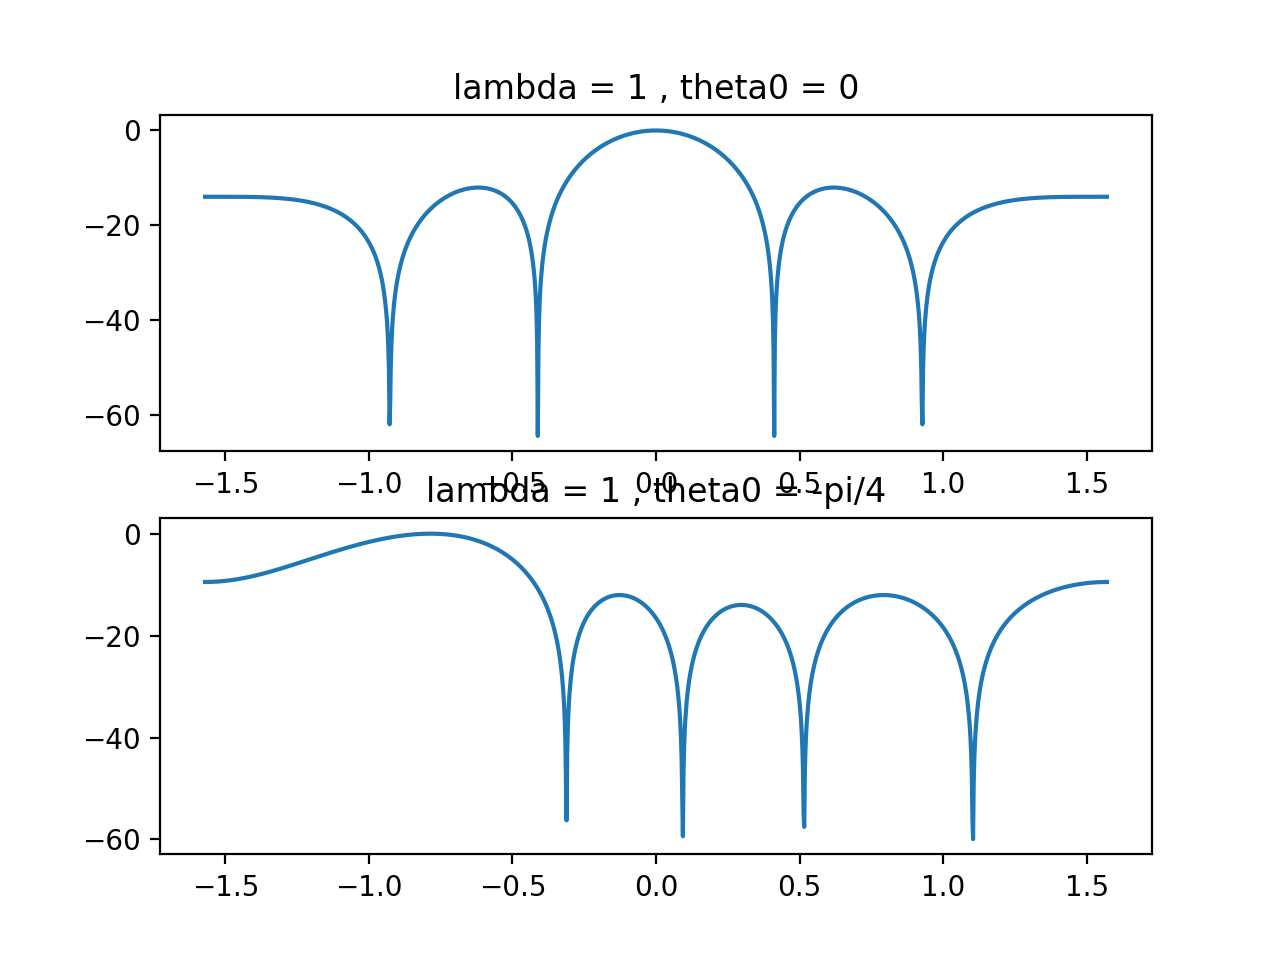

In [50]:

theta0 = 0
lam = 1
plt.figure()
plt.subplot(211)
DP01 = []
for i in range(2*N+1):
    DP01.append(DP(angle[i]))
plt.title("lambda = 1 , theta0 = 0")
plt.plot(angle,DP01)


#Autre source
theta0 = - np.pi/4

plt.subplot(212)
DPpi1 = []
for i in range(2*N+1):
    DPpi1.append(DP(angle[i]))

plt.title("lambda = 1 , theta0 = -pi/4")
plt.plot(angle,DPpi1)

plt.show()

#Je répertorie mes différents diagramme de rayonnement

DPs = {}
DPs["0"] = DP01
DPs["-pi/4"] = DPpi1


## Détection de la direction de la source

Dans l'idée, il faudrait dans un premier temps repérer la (Ou les) sources qui éclairent notre cible, en fonction de ce que mesure notre array dans le temps.

## Placement de zéros

Maintenant que nous avons les directions d'intérêt, il faut limiter la puissance du diagramme de rayonnement de notre array dans celles-ci. 
